## 가우시안 혼합 모형과 EM 방법

## 가우시안 혼합 모형 (Gaussian Mixture Model)
- 실수 값을 출력하는 확률 변수 X가 사실 눈에 보이지 않는 K-class 카테고리 확률변수 Z의 값에 따라 다른 기댓값과 분산을 가지는 복수의 가우시안 정규 분포들로 이루어진 모형을 가우시안 혼합 모형이라고 한다.

## 베르누이-가우시안 혼합 모형 (Bern Gaussian Mixture)
- 카테고리가 두 개인 가우시안 혼합 모형은 베르누이-가우시안 혼합 모형 (Bernouilli Gaussian-Mixture Model)이라고 한다.
- 아래는 2개의 Cateogory와 가우시안 정규 분포를 가지는 가우시안 혼합 모형이다.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


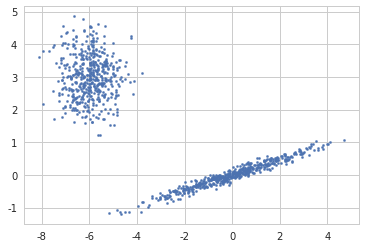

In [2]:
%matplotlib inline
from numpy.random import randn

n_samples = 500

mu1 = np.array([0, 0])
mu2 = np.array([-6, 3])
sigma1 = np.array([[0, -0.1], [1.7, .4]])
sigma2 = np.eye(2)

np.random.seed(0)
X = np.r_[1.0 * np.dot(randn(n_samples, 2), sigma1) + mu1,
         0.7 * np.dot(randn(n_samples, 2), sigma2) + mu2,]

plt.scatter(X[:, 0], X[:, 1], s=5)
plt.show()

## 가우시안 혼합 모형과 모수 추정과 내재변수모형
## EM (Expectation-Maximization)
- 혼합 모형의 모수추정에서 중요한 역할을 하는 것 중의 하나가 바로 각 데이터가 어떤 카테고리에 속하는가를 알려주는 조건부 확률 p(zlx) 값이다. 이 값을 responsibility라고 한다.

## Clustering
- 각각의 데이터에 대해 responsibility를 알게 되면 responsibility가 가장 큰 카테고리를 찾아내어 그 데이터가 어떤 카테고리에 속하는지를 알 수 있다. 즉 클러스터링이 가능하다.
- k = arg max rik

#### Scikit-Learn의 GaussianMixture Class

In [3]:
from sklearn.mixture import GaussianMixture

model = GaussianMixture(n_components=2, init_params='random', random_state=0, 
                       max_iter = 1)
model.fit(X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\base.py:237: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


GaussianMixture(covariance_type='full', init_params='random', max_iter=1,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [4]:
gamma = model.predict_proba(X)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


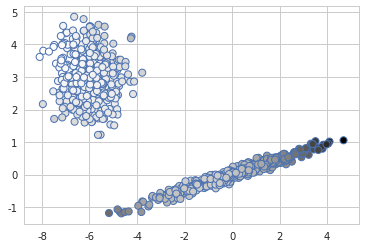

In [5]:
plt.scatter(X[:, 0], X[:, 1], s=50, linewidth=1, edgecolors='b', 
           cmap=plt.cm.binary, c=gamma[:, 0])
plt.show()

In [11]:
def plot_gaussianmixture(n, k=10):
    model = GaussianMixture(n_components=2, init_params = 'random', random_state=1, tol=1e-9, max_iter=n)
    model.fit(X)
    gamma = model.predict_proba(X)
    plt.scatter(X[:,0], X[:, 1], s=50, linewidth=1, edgecolors='b', cmap=plt.cm.binary, c=gamma[:, 0])
    plt.show()
    return model

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\base.py:237: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


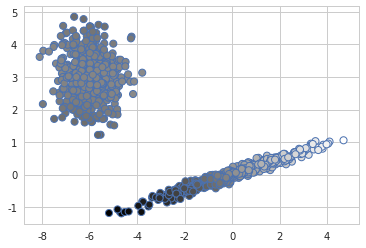

In [12]:
plot_gaussianmixture(5);

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\base.py:237: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


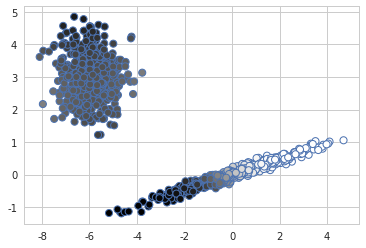

In [13]:
plot_gaussianmixture(10);

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\base.py:237: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


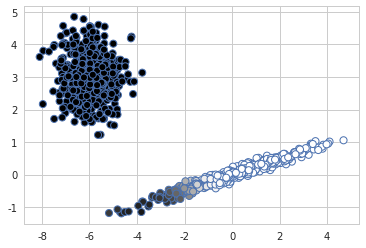

In [14]:
plot_gaussianmixture(15);

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


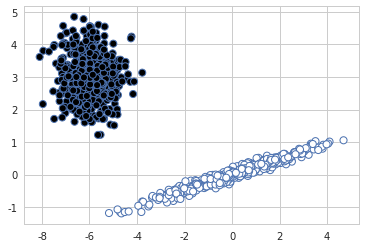

In [15]:
plot_gaussianmixture(20);